## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_table("data/airfoil_self_noise.dat", 
                        header=None, 
                        names=['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 
                               'suction_side_displacement_thickness', 'scaled_sound_pressure_level'])
dataset.head()

frequency  angle_of_attack  chord_length  free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   suction_side_displacement_thickness  scaled_sound_pressure_level  
0                             0.002663                      126.201  
1                             0.002663                      125.201  
2                             0.002663                      125.951  
3                             0.002663                      127.591  
4                             0.002663                      127.461

## Dataset description

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [4]:
dataset.isna().sum()

frequency                              0
angle_of_attack                        0
chord_length                           0
free_stream_velocity                   0
suction_side_displacement_thickness    0
scaled_sound_pressure_level            0
dtype: int64

In [5]:
dataset.describe()

frequency  angle_of_attack  chord_length  free_stream_velocity  \
count   1503.000000      1503.000000   1503.000000           1503.000000   
mean    2886.380572         6.782302      0.136548             50.860745   
std     3152.573137         5.918128      0.093541             15.572784   
min      200.000000         0.000000      0.025400             31.700000   
25%      800.000000         2.000000      0.050800             39.600000   
50%     1600.000000         5.400000      0.101600             39.600000   
75%     4000.000000         9.900000      0.228600             71.300000   
max    20000.000000        22.200000      0.304800             71.300000   

       suction_side_displacement_thickness  scaled_sound_pressure_level  
count                          1503.000000                  1503.000000  
mean                              0.011140                   124.835943  
std                               0.013150                     6.898657  
min                               0.000401                   103.380000  
25%                               0.002535                   120.191000  
50%                               0.004957                   125.721000  
75%                               0.015576                   129.995500  
max                               0.058411                   140.987000

## Data distribution

<Figure size 432x288 with 0 Axes>

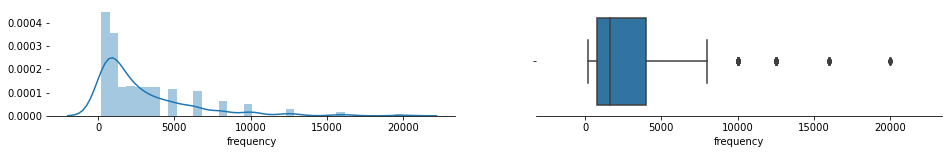

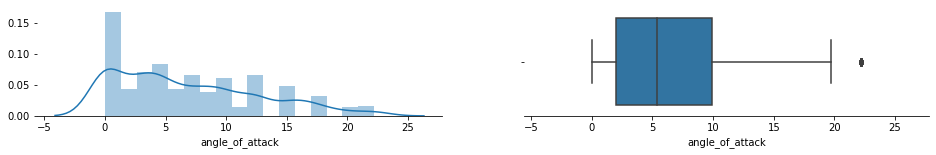

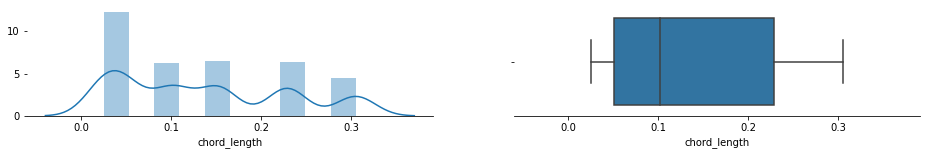

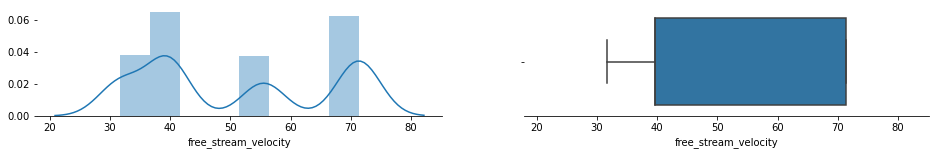

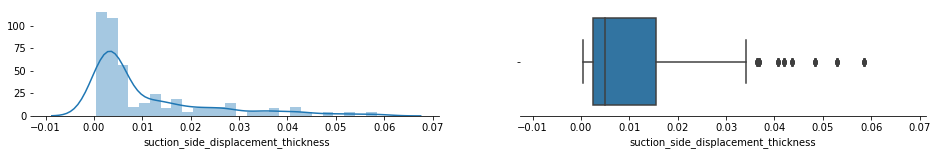

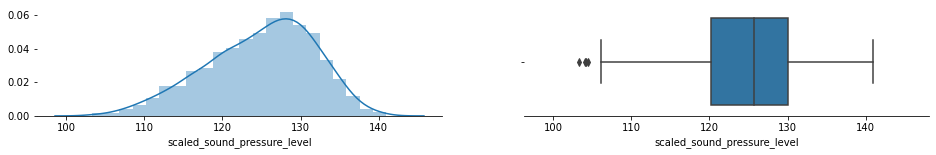

In [6]:
columns=dataset.columns.tolist()

plt.rcParams.update({'figure.max_open_warning': 0})
for i in range(dataset.shape[1]):
    plt.figure(i)
    
    f, axes = plt.subplots( 1, 2, figsize=(16, 2), sharex=True)
    sns.despine(left=True)

    sns.distplot(dataset[columns[i]], ax=axes[0])
    sns.boxplot(dataset[columns[i]], ax=axes[1])

plt.show()

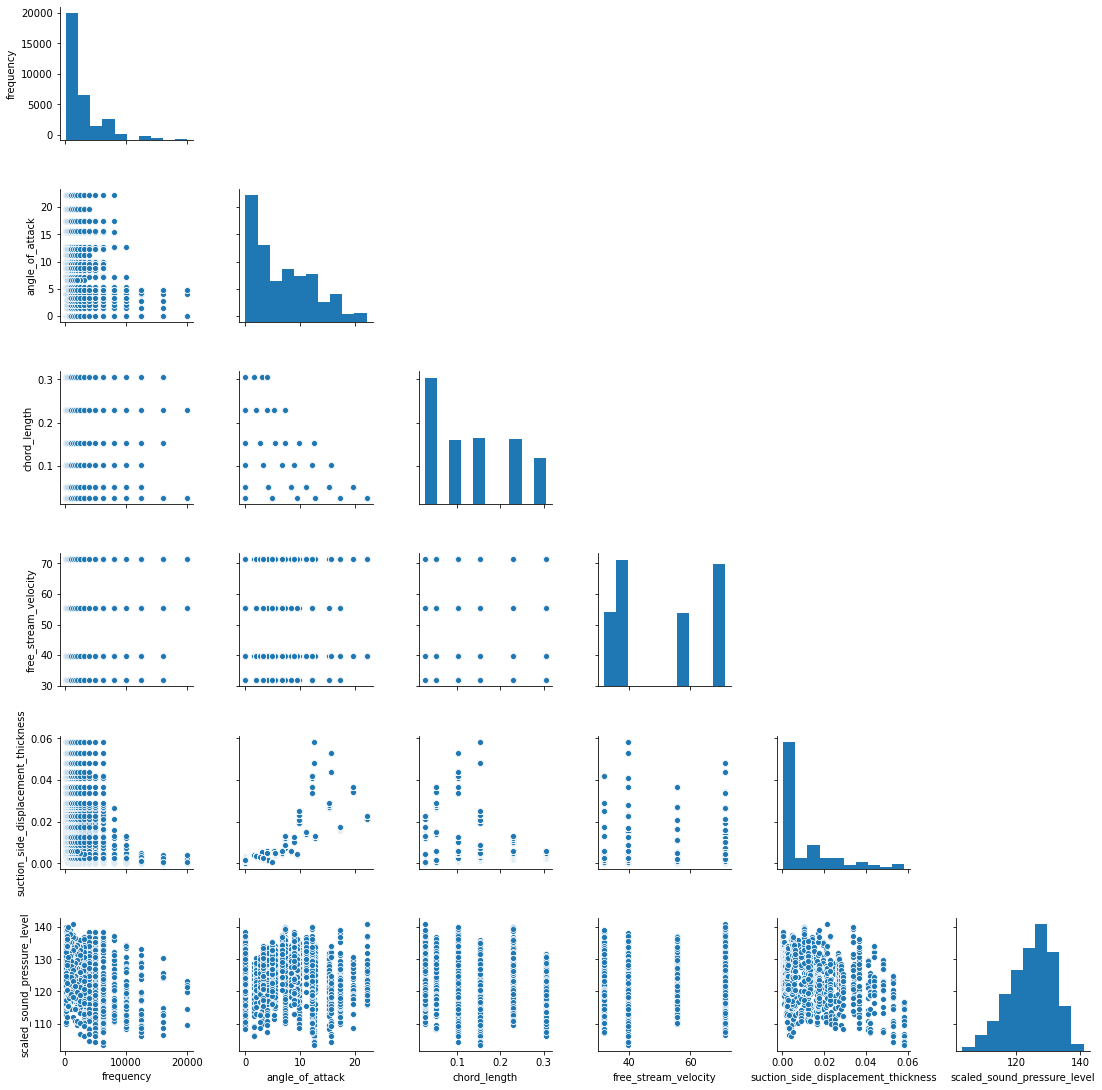

In [7]:
g = sns.pairplot(dataset)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

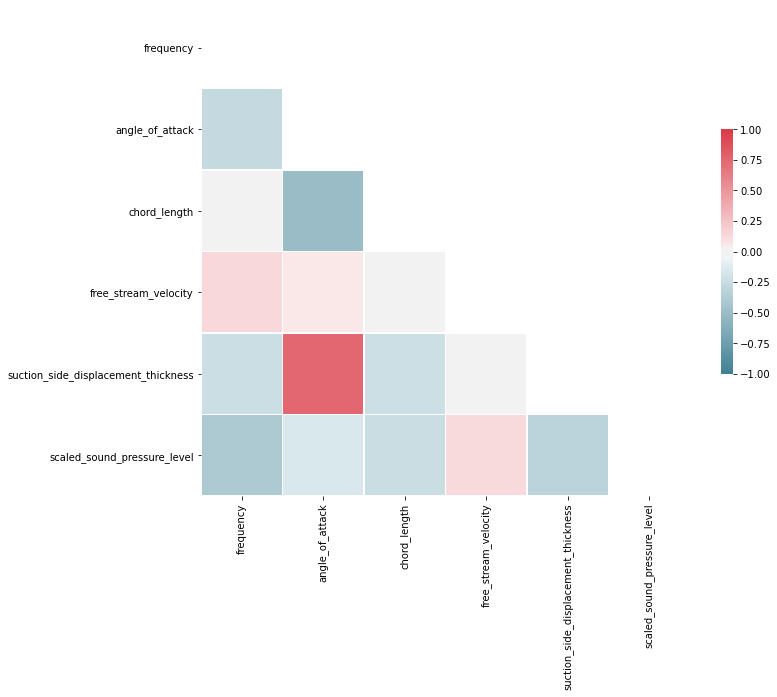

In [8]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Removing outliers

In [9]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
IQR

frequency                              3200.000000
angle_of_attack                           7.900000
chord_length                              0.177800
free_stream_velocity                     31.700000
suction_side_displacement_thickness       0.013041
scaled_sound_pressure_level               9.804500
dtype: float64

In [10]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.describe()

frequency  angle_of_attack  chord_length  free_stream_velocity  \
count  1263.000000      1263.000000   1263.000000           1263.000000   
mean   2375.399842         6.038480      0.141922             50.520190   
std    2090.999167         5.259982      0.095703             15.584664   
min     200.000000         0.000000      0.025400             31.700000   
25%     800.000000         2.000000      0.050800             39.600000   
50%    1600.000000         4.800000      0.152400             39.600000   
75%    3150.000000         9.500000      0.228600             71.300000   
max    8000.000000        19.700000      0.304800             71.300000   

       suction_side_displacement_thickness  scaled_sound_pressure_level  
count                          1263.000000                  1263.000000  
mean                              0.008148                   125.862091  
std                               0.008365                     6.211957  
min                               0.000401                   108.185000  
25%                               0.002535                   121.584500  
50%                               0.004614                   126.632000  
75%                               0.012181                   130.432500  
max                               0.034118                   140.158000

<Figure size 432x288 with 0 Axes>

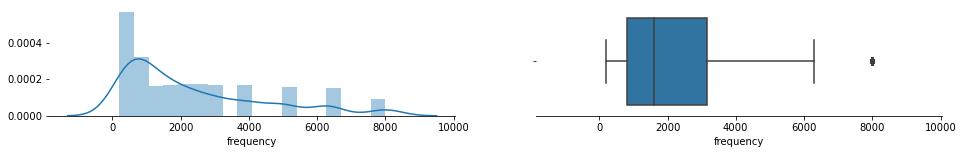

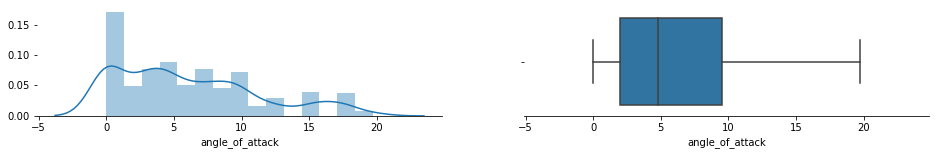

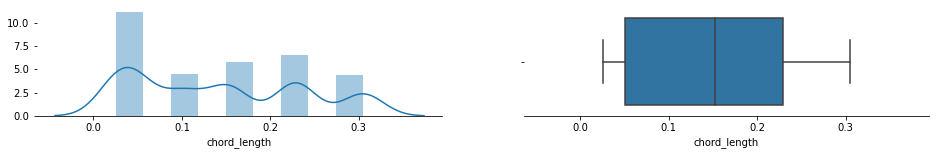

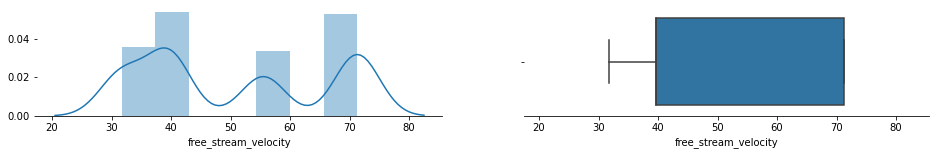

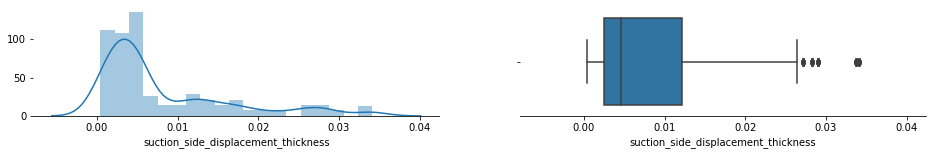

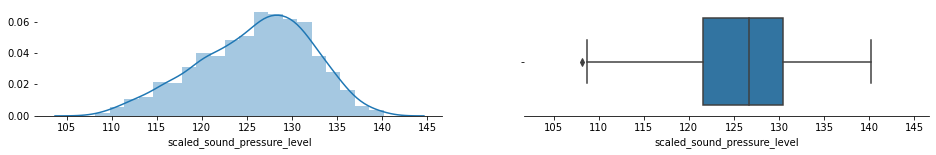

In [11]:
columns=dataset.columns.tolist()

plt.rcParams.update({'figure.max_open_warning': 0})
for i in range(dataset.shape[1]):
    plt.figure(i)
    
    f, axes = plt.subplots( 1, 2, figsize=(16, 2), sharex=True)
    sns.despine(left=True)

    sns.distplot(dataset[columns[i]], ax=axes[0])
    sns.boxplot(dataset[columns[i]], ax=axes[1])

plt.show()

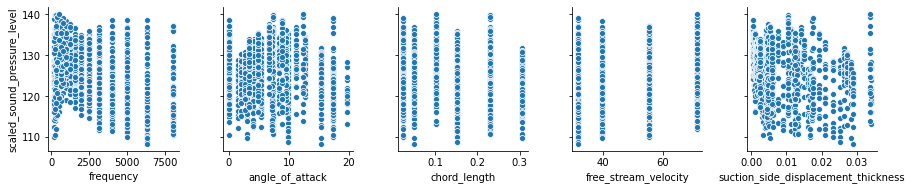

In [12]:
sns.pairplot(dataset, y_vars=dataset.columns[-1], x_vars=dataset.columns[:-1])